In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
data = pd.read_csv("train.csv")

data = data.drop(["casual", "registered"],axis=1) #test資料中沒有
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [27]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [28]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [50]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [51]:
data["weekday"] = pd.DatetimeIndex(data["datetime"]).weekday
data["hour"] = pd.DatetimeIndex(data["datetime"]).hour
data["day"] = pd.DatetimeIndex(data["datetime"]).day
data["month"] = pd.DatetimeIndex(data["datetime"]).month
data["year"] = pd.DatetimeIndex(data["datetime"]).year
print(data.head())


data = data.drop("datetime",axis=1)


             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  weekday  hour  day  month  year  
0        81        0.0     16        5     0    1      1  2011  
1        80        0.0     40        5     1    1      1  2011  
2        80        0.0     32        5     2    1      1  2011  
3        75        0.0     13        5     3    1      1  2011  
4        75        0.0      1        5     4    1      1  2011  


In [52]:
print(data.loc[:,["temp", "atemp", "humidity", "windspeed",  "count", "hour","day","month", "weekday", "year"]].describe())

              temp         atemp      humidity     windspeed         count  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395    191.574132   
std        7.79159      8.474601     19.245033      8.164537    181.144454   
min        0.82000      0.760000      0.000000      0.000000      1.000000   
25%       13.94000     16.665000     47.000000      7.001500     42.000000   
50%       20.50000     24.240000     62.000000     12.998000    145.000000   
75%       26.24000     31.060000     77.000000     16.997900    284.000000   
max       41.00000     45.455000    100.000000     56.996900    977.000000   

               hour           day         month       weekday          year  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean      11.541613      9.992559      6.521495      3.013963   2011.501929  
std        6.915838      5.476608      3.444373      2.004585  

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


Text(0.5, 1.0, 'season')

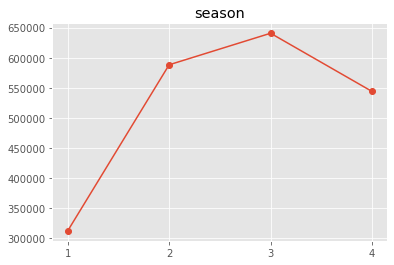

In [53]:
print(data["season"].value_counts())

plt.style.use("ggplot")
season = data.loc[:,["season", "count"]].groupby("season").sum()
plt.plot(season.index, season.values, marker = "o")
plt.xticks(season.index, [1,2,3,4])
plt.title("season")



0    10575
1      311
Name: holiday, dtype: int64


Text(0.5, 1.0, 'holiday')

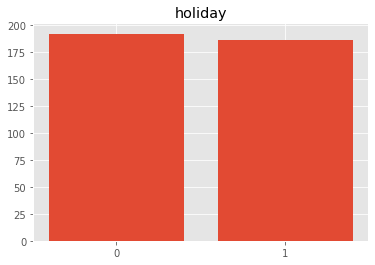

In [54]:
print(data["holiday"].value_counts())

holiday = data.loc[:, ["holiday", "count"]].groupby("holiday").mean()

plt.bar(holiday.index, holiday["count"])
plt.xticks(holiday.index, [0,1])
plt.title("holiday")

1    7412
0    3474
Name: workingday, dtype: int64


Text(0.5, 1.0, 'workingday')

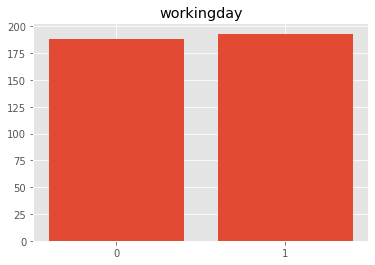

In [95]:
print(data["workingday"].value_counts())

workingday = data.loc[:, ["workingday", "count"]].groupby("workingday").mean()

plt.bar(workingday.index, workingday["count"])
plt.xticks(workingday.index, [0,1])
plt.title("workingday")

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


Text(0.5, 1.0, 'weather')

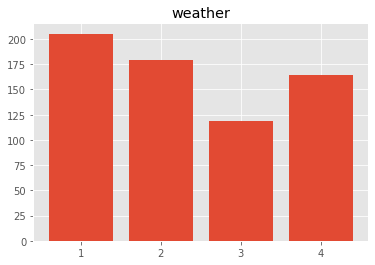

In [55]:
print(data["weather"].value_counts())

weather = data.loc[:, ["weather", "count"]].groupby("weather").mean()

plt.bar(weather.index, weather["count"])
plt.xticks(weather.index, [1,2,3,4])
plt.title("weather")

Text(0.5, 1.0, 'hour')

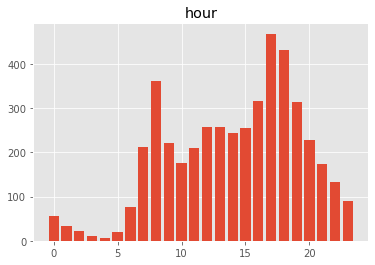

In [97]:

hour = data.loc[:, ["hour", "count"]].groupby("hour").mean()

plt.bar(hour.index, hour["count"])
plt.title("hour")

Text(0.5, 1.0, 'day')

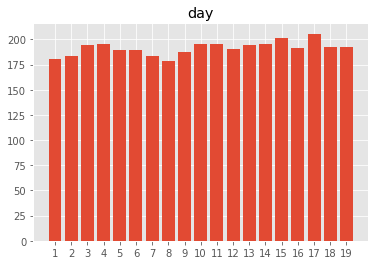

In [162]:
day = data.loc[:, ["day", "count"]].groupby("day").mean()

plt.bar(day.index, day["count"])
plt.xticks(day.index, [i for i in range(1,20)])
plt.title("day")

Text(0.5, 1.0, 'month')

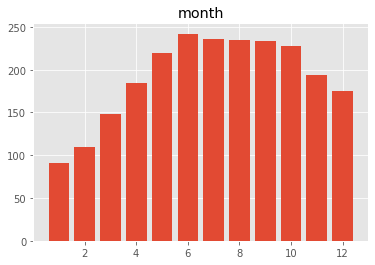

In [163]:
month = data.loc[:, ["month", "count"]].groupby("month").mean()

plt.bar(month.index, month["count"])
plt.title("month")

Text(0.5, 1.0, 'weekday')

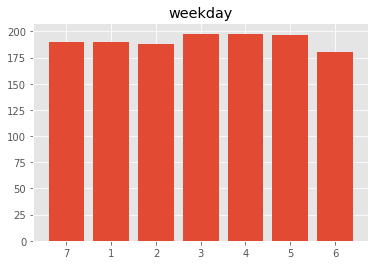

In [58]:
weekday = data.loc[:, ["weekday", "count"]].groupby("weekday").mean()

plt.bar(weekday.index, weekday["count"])

plt.xticks(weekday.index, [7,1,2,3,4,5,6])
plt.title("weekday")

Text(0.5, 1.0, 'year')

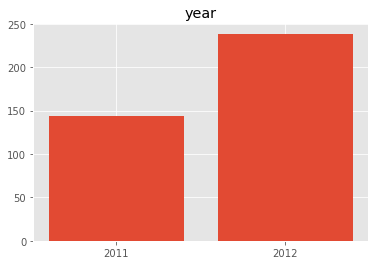

In [60]:
year = data.loc[:, ["year", "count"]].groupby("year").mean()

plt.bar(year.index, year["count"])

plt.xticks(year.index, [2011,2012])
plt.title("year")

Text(0, 0.5, 'temp')

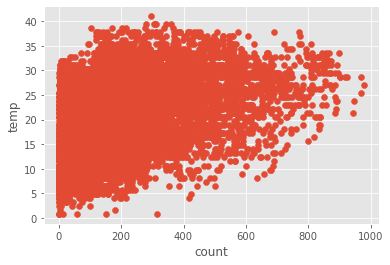

In [61]:
plt.scatter(data["count"], data["temp"])
plt.xlabel("count")
plt.ylabel("temp")

Text(0, 0.5, 'atemp')

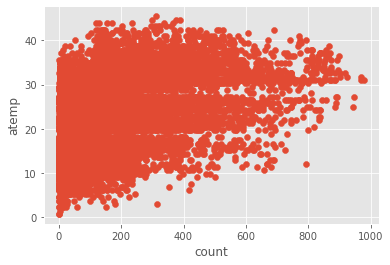

In [99]:
plt.scatter(data["count"], data["atemp"])
plt.xlabel("count")
plt.ylabel("atemp")

Text(0, 0.5, 'humidity')

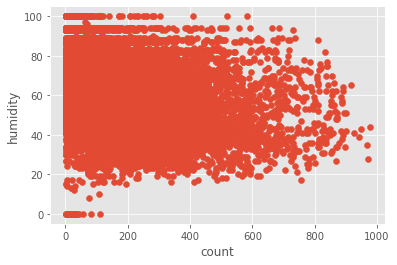

In [100]:
plt.scatter(data["count"], data["humidity"])
plt.xlabel("count")
plt.ylabel("humidity")

Text(0, 0.5, 'windspeed')

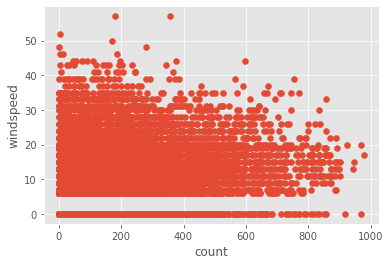

In [101]:
plt.scatter(data["count"], data["windspeed"])
plt.xlabel("count")
plt.ylabel("windspeed")

In [9]:
import seaborn as sns

<AxesSubplot:>

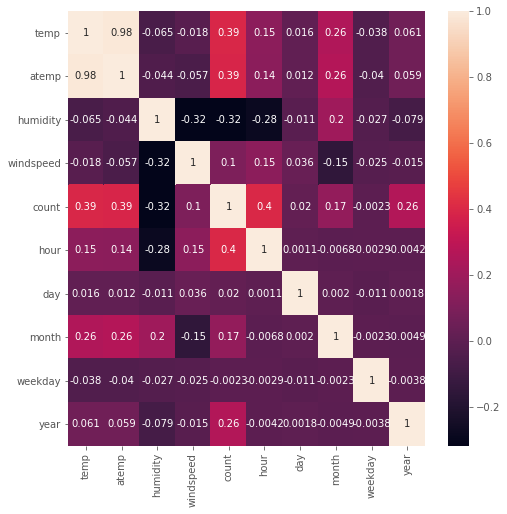

In [63]:
origin =  data.loc[:,["temp", "atemp", "humidity", "windspeed", "count", "hour","day","month" , "weekday", "year"]]
std =  data.loc[:,["temp", "atemp", "humidity", "windspeed",  "count", "hour","day","month", "weekday", "year"]].std()
mean =  data.loc[:,["temp", "atemp", "humidity", "windspeed",  "count", "hour","day","month", "weekday", "year"]].mean()

normalization = (origin - mean) / std
corr = normalization.loc[:,["temp", "atemp", "humidity", "windspeed",  "count", "hour","day","month", "weekday", "year"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
season = pd.get_dummies(data["season"])
season.columns = ["春", "夏", "秋", "冬"]

holiday = pd.get_dummies(data["holiday"])
holiday.columns = ["非holiday", "holiday"]

workingday = pd.get_dummies(data["workingday"])
workingday.columns = ["非workingday", "workingday"]

weather = pd.get_dummies(data["weather"])
weather.columns = ["天氣1", "天氣2", "天氣3", "天氣4"]

In [66]:
target = data["count"]
data = data.loc[:,["temp", "atemp", "humidity", "windspeed",   "hour","day","month", "weekday", "year"]]

data.loc[:,["temp", "atemp", "humidity", "windspeed",   "hour","day","month", "weekday", "year"]] = StandardScaler().fit_transform(data.loc[:,["temp", "atemp", "humidity", "windspeed",   "hour","day","month", "weekday", "year"]])



In [67]:
data = pd.concat([data, season, holiday, workingday, weather], axis=1)

In [68]:
data.head()

,temp,atemp,humidity,windspeed,hour,day,month,weekday,year,春,...,秋,冬,非holiday,holiday,非workingday,workingday,天氣1,天氣2,天氣3,天氣4
0,-1.333661,-1.092737,0.993213,-1.567754,-1.668944,-1.64207,-1.603121,0.990793,-1.003866,1,...,0,0,1,0,1,0,1,0,0,0
1,-1.438907,-1.182421,0.941249,-1.567754,-1.524341,-1.64207,-1.603121,0.990793,-1.003866,1,...,0,0,1,0,1,0,1,0,0,0
2,-1.438907,-1.182421,0.941249,-1.567754,-1.379739,-1.64207,-1.603121,0.990793,-1.003866,1,...,0,0,1,0,1,0,1,0,0,0
3,-1.333661,-1.092737,0.681430,-1.567754,-1.235137,-1.64207,-1.603121,0.990793,-1.003866,1,...,0,0,1,0,1,0,1,0,0,0
4,-1.333661,-1.092737,0.681430,-1.567754,-1.090534,-1.64207,-1.603121,0.990793,-1.003866,1,...,0,0,1,0,1,0,1,0,0,0


In [69]:
feature_train, feature_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
feature_train_select = feature_train.loc[:, ["hour", "temp", "atemp"]]
model = RandomForestRegressor()
model.fit(feature_train_select, target_train)
print("hour temp atemp")
print("訓練")
print("mae: ", mean_absolute_error(target_train, model.predict(feature_train_select)))
print("mse: ", mean_squared_error(target_train, model.predict(feature_train_select)))
print("r2: ", r2_score(target_train, model.predict(feature_train_select)))

hour temp atemp
訓練
mae:  60.079371693191
mse:  8589.301194820056
r2:  0.737360626530048


In [72]:
model = RandomForestRegressor()
model.fit(feature_train, target_train)
print("全部feature")
print("訓練")
print("mae: ", mean_absolute_error(target_train, model.predict(feature_train)))
print("mse: ", mean_squared_error(target_train, model.predict(feature_train)))
print("r2: ", r2_score(target_train, model.predict(feature_train)))

全部feature
訓練
mae:  9.185801561782268
mse:  232.8012602204869
r2:  0.9928815190269266


In [73]:
for i in range(100, 300, 20):
    
    model = RandomForestRegressor(n_estimators=i)
    model.fit(feature_train, target_train)
    print(f"n_estimator = {i}")
    print()
    
    print("訓練")
    print("mae: ", mean_absolute_error(target_train, model.predict(feature_train)))
    print("mse: ", mean_squared_error(target_train, model.predict(feature_train)))
    print("r2: ", r2_score(target_train, model.predict(feature_train)))
    print("===========================================")

n_estimator = 100

訓練
mae:  9.161087505741847
mse:  229.702877319706
r2:  0.9929762598359136
n_estimator = 120

訓練
mae:  9.143145192160466
mse:  225.3020571521079
r2:  0.993110825922881
n_estimator = 140

訓練
mae:  9.1346216943369
mse:  226.12972591471132
r2:  0.993085517879733
n_estimator = 160

訓練
mae:  9.091330529398256
mse:  222.9658465949055
r2:  0.9931822614055962
n_estimator = 180

訓練
mae:  9.109776450773236
mse:  224.80052836330438
r2:  0.9931261614203658
n_estimator = 200

訓練
mae:  9.115765962333484
mse:  228.94586069706017
r2:  0.9929994075131191
n_estimator = 220

訓練
mae:  9.080362362717668
mse:  223.24971642158633
r2:  0.993173581375436
n_estimator = 240

訓練
mae:  9.08335582223243
mse:  223.57377530997994
r2:  0.9931636724641655
n_estimator = 260

訓練
mae:  9.07227218119501
mse:  221.52434652349876
r2:  0.9932263388767459
n_estimator = 280

訓練
mae:  9.029349858914626
mse:  219.54354140691646
r2:  0.9932869069489307


<h1>n_estimators = 280

In [76]:
model = RandomForestRegressor(n_estimators=280)
model.fit(feature_train, target_train)


print("test")
print("mae: ", mean_absolute_error(target_test, model.predict(feature_test)))
print("mse: ", mean_squared_error(target_test, model.predict(feature_test)))
print("r2: ", r2_score(target_test, model.predict(feature_test)))
print()

test
mae:  25.24562508198872
mse:  1771.6639269550794
r2:  0.9466781393354357



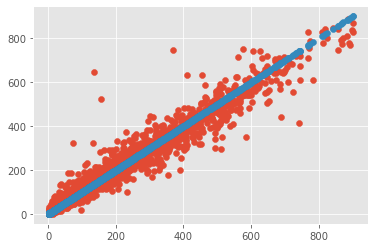

In [78]:
plt.scatter(target_test,model.predict(feature_test))
plt.scatter(target_test,target_test )

In [79]:
import joblib

In [80]:
joblib.dump(model, "model")

['model']